In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('temperatures.csv')

In [3]:
df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03


In [4]:
df.corr()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
YEAR,1.000000,0.575499,0.647066,0.553886,0.540662,0.407648,0.371840,0.478512,0.654138,0.664008,0.589073,0.697887,0.732222,0.801129,0.679869,0.640438,0.677061,0.749792
JAN,0.575499,1.000000,0.647017,0.457081,0.594674,0.365236,0.292855,0.339337,0.459944,0.499764,0.480695,0.526615,0.595902,0.749880,0.874226,0.575734,0.496515,0.607752
FEB,0.647066,0.647017,1.000000,0.589088,0.548803,0.377722,0.341302,0.418956,0.503188,0.472755,0.466916,0.519595,0.619320,0.792541,0.928731,0.635904,0.544527,0.609839
MAR,0.553886,0.457081,0.589088,1.000000,0.618621,0.387756,0.228349,0.232647,0.382344,0.370066,0.312226,0.498202,0.523316,0.689205,0.584612,0.848637,0.380640,0.505879
APR,0.540662,0.594674,0.548803,0.618621,1.000000,0.563317,0.299866,0.286052,0.490668,0.437970,0.473873,0.538037,0.579775,0.770596,0.643942,0.878402,0.474542,0.596943
MAY,0.407648,0.365236,0.377722,0.387756,0.563317,1.000000,0.274521,0.299072,0.473171,0.347289,0.468993,0.482822,0.444695,0.609015,0.403316,0.708221,0.431314,0.503445
JUN,0.371840,0.292855,0.341302,0.228349,0.299866,0.274521,1.000000,0.480925,0.504354,0.305761,0.380782,0.419968,0.366242,0.520189,0.351115,0.341301,0.749132,0.409325
JUL,0.478512,0.339337,0.418956,0.232647,0.286052,0.299072,0.480925,1.000000,0.622985,0.531865,0.568341,0.535413,0.440813,0.588454,0.423876,0.321388,0.799602,0.541023
AUG,0.654138,0.459944,0.503188,0.382344,0.490668,0.473171,0.504354,0.622985,1.000000,0.680212,0.661177,0.588961,0.595330,0.755384,0.534818,0.560118,0.866202,0.665040
SEP,0.664008,0.499764,0.472755,0.370066,0.437970,0.347289,0.305761,0.531865,0.680212,1.000000,0.680744,0.683866,0.629223,0.730756,0.529533,0.485397,0.778875,0.734650


In [5]:
# HIGHLY CORRELATED

In [6]:
X = df.iloc[:,0:1]
Y = df.iloc[:,13:14]

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=1)

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 1)
(12, 1)
(105, 1)
(12, 1)


In [9]:
model_highly = LinearRegression()
model_highly.fit(x_train,y_train)

LinearRegression()

In [11]:
y_test = np.array(y_test)
y_pred = model_highly.predict(x_test)
print(y_pred.shape)

(12, 1)


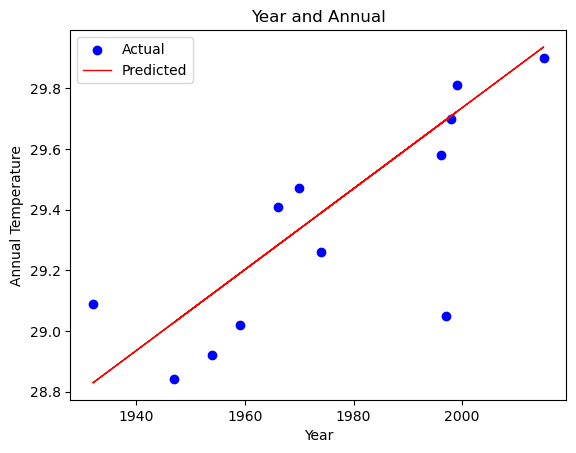

In [12]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, color='red',linewidth=1)
plt.title("Year and Annual")
plt.xlabel("Year")
plt.ylabel("Annual Temperature")
plt.legend(["Actual","Predicted"])
plt.show()

In [13]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r_squared = r2_score(y_test,y_pred)
print("MAE",mae)
print("MSE",mse)
print("R2_Score",r_squared)

MAE 0.17453544059592888
MSE 0.055126249970530235
R2_Score 0.5358522341059372


In [14]:
# LEAST CORRELATED
Xl = df.iloc[:,3:4] # March
Yl = df.iloc[:,6:7] # June

In [15]:
x_trainl,x_testl,y_trainl,y_testl = train_test_split(Xl,Yl,test_size=0.1,random_state=1)
print(x_trainl.shape)
print(x_testl.shape)
print(y_trainl.shape)
print(y_testl.shape)

(105, 1)
(12, 1)
(105, 1)
(12, 1)


In [16]:
model_least = LinearRegression()
model_least.fit(x_trainl,y_trainl)

LinearRegression()

In [17]:
y_testl = np.array(y_testl)
y_predl = model_least.predict(x_testl)
print(y_predl.shape)

(12, 1)


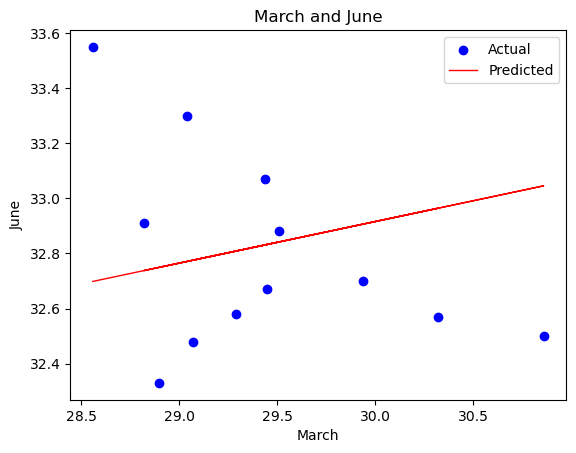

In [18]:
plt.scatter(x_testl, y_testl, color='blue')
plt.plot(x_testl, y_predl, color='red',linewidth=1)
plt.title("March and June")
plt.xlabel("March")
plt.ylabel("June")
plt.legend(["Actual","Predicted"])
plt.show()

In [19]:
mae = mean_absolute_error(y_testl,y_predl)
mse = mean_squared_error(y_testl,y_predl)
r_squared = r2_score(y_testl,y_predl)
print("MAE",mae)
print("MSE",mse)
print("R2_Score",r_squared)

MAE 0.34025858266353676
MSE 0.16094565569056557
R2_Score -0.3364804292345114


In [20]:
# 10% - 90%
train_sse = []
test_sse =[]

In [21]:
XX = df.iloc[:,0:1]
YY = df.iloc[:,13:14]

In [23]:
for i in range(1,10):
    p=i*0.1
    x_train,x_test,y_train,y_test = train_test_split(XX,YY,test_size=p,random_state=2)
    print(x_train.shape)
    print(x_test.shape)
    print(y_train.shape)
    print(y_test.shape)
    print()
    # Train Model
    model = LinearRegression()
    model.fit(x_train,y_train)
    # Training Error
    y_train = np.array(y_train)
    y_train_pred = model.predict(x_train)
    sse = [(y_train_pred[i]-y_train[i]) ** 2 for i in range(len(y_train))]
    p = sum(sse)
    train_sse.append(p)
    # Test Error
    y_test = np.array(y_test)
    y_test_pred = model.predict(x_test)
    sse = [(y_test_pred[i]-y_test[i]) ** 2 for i in range(len(y_test))]
    q = sum(sse)
    test_sse.append(q)

(105, 1)
(12, 1)
(105, 1)
(12, 1)

(93, 1)
(24, 1)
(93, 1)
(24, 1)

(81, 1)
(36, 1)
(81, 1)
(36, 1)

(70, 1)
(47, 1)
(70, 1)
(47, 1)

(58, 1)
(59, 1)
(58, 1)
(59, 1)

(46, 1)
(71, 1)
(46, 1)
(71, 1)

(35, 1)
(82, 1)
(35, 1)
(82, 1)

(23, 1)
(94, 1)
(23, 1)
(94, 1)

(11, 1)
(106, 1)
(11, 1)
(106, 1)



[array([12.13381435]), array([11.2148919]), array([9.96843988]), array([8.56565984]), array([5.61479713]), array([2.64748767]), array([2.05233832]), array([1.30434614]), array([0.59482687])]
[array([0.69108957]), array([1.62892695]), array([2.91191226]), array([4.64221039]), array([7.73394435]), array([10.20670888]), array([10.93913105]), array([12.70452079]), array([13.40706902])]


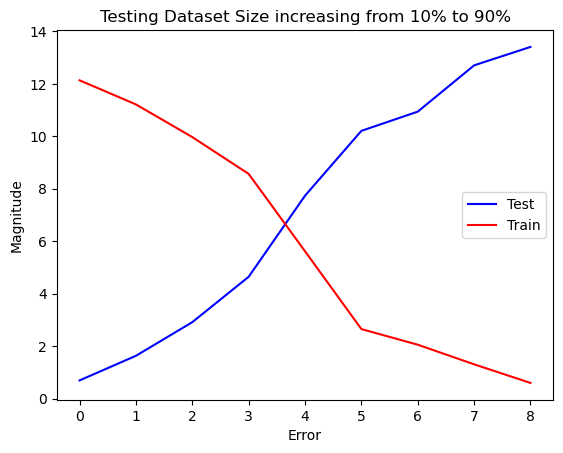

In [24]:
print(train_sse)
print(test_sse)

plt.plot(test_sse,color='b')
plt.plot(train_sse,color='r')
plt.title("Testing Dataset Size increasing from 10% to 90%")
plt.xlabel("Error")
plt.ylabel("Magnitude")
plt.legend(["Test","Train"])
plt.show()